In [28]:
# 1. Load data into a Pandas DataFrame.

import pandas as pd

df = pd.read_csv('/Users/juan504n/Documents/data/data_analyst_pracex.csv')
df

,read_ws,letrid_ws,appro_ws,wdatk_ws,part_id2,gender,random,insample
0,438.0,423.0,436.0,452.0,123,F,0.003441,1
1,447.0,431.0,436.0,464.0,163,M,0.005228,1
2,484.0,470.0,427.0,498.0,176,F,0.007335,1
3,NaN,NaN,NaN,NaN,227,F,0.008201,1
4,492.0,480.0,456.0,503.0,291,F,0.010066,1
...,...,...,...,...,...,...,...,...
95,472.0,460.0,449.0,484.0,171,F,0.289431,1
96,420.0,396.0,440.0,443.0,178,M,0.293460,1
97,427.0,402.0,444.0,451.0,20,M,0.302567,1
98,467.0,457.0,462.0,477.0,43,M,0.307276,1


In [3]:
df.columns

Index(['read_ws', 'letrid_ws', 'appro_ws', 'wdatk_ws', 'part_id2', 'gender',
       'random', 'insample'],
      dtype='object')

# 2. Reorder the variables so the key variable (part_id2) is first.

In [29]:
df = df[['part_id2', 'read_ws', 'letrid_ws', 'appro_ws', 'wdatk_ws', 'gender','random', 'insample']]
df

,part_id2,read_ws,letrid_ws,appro_ws,wdatk_ws,gender,random,insample
0,123,438.0,423.0,436.0,452.0,F,0.003441,1
1,163,447.0,431.0,436.0,464.0,M,0.005228,1
2,176,484.0,470.0,427.0,498.0,F,0.007335,1
3,227,NaN,NaN,NaN,NaN,F,0.008201,1
4,291,492.0,480.0,456.0,503.0,F,0.010066,1
...,...,...,...,...,...,...,...,...
95,171,472.0,460.0,449.0,484.0,F,0.289431,1
96,178,420.0,396.0,440.0,443.0,M,0.293460,1
97,20,427.0,402.0,444.0,451.0,M,0.302567,1
98,43,467.0,457.0,462.0,477.0,M,0.307276,1


# 3. Sort on the key variable (smallest to largest).

In [30]:
df = df.sort_values(by=['part_id2'])
df

,part_id2,read_ws,letrid_ws,appro_ws,wdatk_ws,gender,random,insample
52,7,403.0,384.0,440.0,423.0,F,0.165091,1
72,8,436.0,404.0,432.0,468.0,M,0.213703,1
92,13,454.0,434.0,462.0,474.0,F,0.274725,1
13,18,426.0,400.0,403.0,452.0,F,0.024717,1
97,20,427.0,402.0,444.0,451.0,M,0.302567,1
...,...,...,...,...,...,...,...,...
5,312,540.0,542.0,444.0,537.0,F,0.012113,1
77,314,382.0,340.0,427.0,423.0,F,0.225161,1
61,318,441.0,404.0,471.0,477.0,F,0.196126,1
7,320,453.0,431.0,476.0,474.0,F,0.016823,1


# 4. Identify all observations with missing data.

In [31]:
df.isnull().sum()

part_id2     0
read_ws      9
letrid_ws    6
appro_ws     2
wdatk_ws     3
gender       0
random       0
insample     0
dtype: int64

In [32]:
# creating bool series True for NaN values  
bool_series = pd.isnull(df["read_ws"])  
    
# filtering data   
df[bool_series] 

,part_id2,read_ws,letrid_ws,appro_ws,wdatk_ws,gender,random,insample
62,22,NaN,NaN,458.0,NaN,M,0.198050,1
11,85,NaN,NaN,471.0,464.0,M,0.020604,1
31,107,NaN,392.0,445.0,407.0,F,0.096404,1
40,192,NaN,416.0,456.0,508.0,F,0.111233,1
3,227,NaN,NaN,NaN,NaN,F,0.008201,1
38,232,NaN,NaN,411.0,398.0,M,0.106785,1
88,259,NaN,NaN,417.0,393.0,M,0.256890,1
74,272,NaN,461.0,NaN,NaN,M,0.219976,1
60,283,NaN,NaN,460.0,467.0,F,0.194914,1


# 5. Recode the gender variable so that it is no longer a string variable without deleting the overwriting the existing gender variable.

Using the LabelEncoder library from sklearn, we can create a new column 'gender_code' that recodes the gender variable

In [33]:
from sklearn.preprocessing import LabelEncoder

df["gender_code"] = LabelEncoder().fit_transform(df["gender"])
df

,part_id2,read_ws,letrid_ws,appro_ws,wdatk_ws,gender,random,insample,gender_code
52,7,403.0,384.0,440.0,423.0,F,0.165091,1,0
72,8,436.0,404.0,432.0,468.0,M,0.213703,1,1
92,13,454.0,434.0,462.0,474.0,F,0.274725,1,0
13,18,426.0,400.0,403.0,452.0,F,0.024717,1,0
97,20,427.0,402.0,444.0,451.0,M,0.302567,1,1
...,...,...,...,...,...,...,...,...,...
5,312,540.0,542.0,444.0,537.0,F,0.012113,1,0
77,314,382.0,340.0,427.0,423.0,F,0.225161,1,0
61,318,441.0,404.0,471.0,477.0,F,0.196126,1,0
7,320,453.0,431.0,476.0,474.0,F,0.016823,1,0


# 6. Find the mean, standard deviation, and range for each variable interval-level variable (except random and insample), excluding missing values.


- Pandas describe() function automatically excludes missing values when calculating the stats. 
- Excluded columns `random` and `insample`

In [18]:
df[['part_id2', 'read_ws', 'letrid_ws', 'appro_ws', 'wdatk_ws', 'gender_code']].describe()

,part_id2,read_ws,letrid_ws,appro_ws,wdatk_ws,gender_code
count,100.000000,91.000000,94.000000,98.000000,97.000000,100.000000
mean,166.040000,441.725275,422.723404,441.653061,459.443299,0.460000
std,96.798439,45.702921,52.944362,19.880624,40.633773,0.500908
min,7.000000,342.000000,320.000000,393.000000,364.000000,0.000000
25%,74.750000,408.000000,388.000000,432.000000,423.000000,0.000000
50%,167.500000,433.000000,408.000000,440.000000,459.000000,0.000000
75%,262.750000,471.000000,459.250000,456.000000,482.000000,1.000000
max,327.000000,550.000000,548.000000,497.000000,554.000000,1.000000


# 7. Repeat #6 but use gender as a grouping variable and find the respective means, standard deviations, and ranges for each, excluding missing values.

- First, we will look at the means of each variable grouped by gender, then we will look at the descriptive statistics for each variable grouped by gender.
- Missing values are excluded in each calculation

In [19]:
df.groupby('gender').mean()

,part_id2,read_ws,letrid_ws,appro_ws,wdatk_ws,random,insample,gender_code
gender,,,,,,,,
F,171.166667,435.180000,415.307692,441.018868,454.924528,0.133130,1.0,0.0
M,160.021739,449.707317,431.904762,442.400000,464.886364,0.165322,1.0,1.0


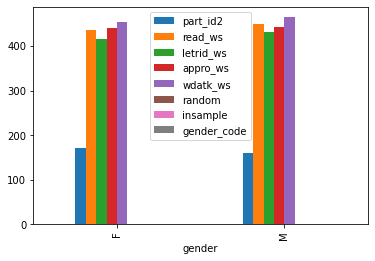

In [43]:
df.groupby('gender').mean().plot.bar()

In [21]:
df.groupby('gender')['read_ws'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,50.0,435.180000,46.337577,342.0,401.5,427.5,466.75,542.0
M,41.0,449.707317,44.165169,357.0,422.0,436.0,478.00,550.0


In [22]:
df.groupby('gender')['letrid_ws'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,52.0,415.307692,52.666743,320.0,379.0,402.0,443.0,548.0
M,42.0,431.904762,52.458025,341.0,397.0,416.0,461.0,548.0


In [23]:
df.groupby('gender')['appro_ws'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,53.0,441.018868,20.987625,393.0,427.0,444.0,453.0,497.0
M,45.0,442.400000,18.700267,398.0,436.0,440.0,458.0,485.0


In [24]:
df.groupby('gender')['wdatk_ws'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,53.0,454.924528,40.722725,364.0,423.00,459.0,484.0,537.0
M,44.0,464.886364,40.314586,372.0,451.75,461.5,480.5,554.0


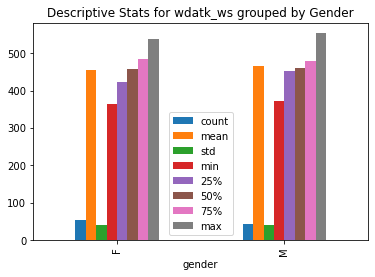

In [45]:
df.groupby('gender')['wdatk_ws'].describe().plot.bar(title='Descriptive Stats for wdatk_ws grouped by Gender')

# 8. Different software packages and applications (such as Stata & SPSS) handle missing values in different ways. Come up with a way for coding or identifying missing values in the dataset so that those cells are no longer blank or empty.

We will use two methods for handling the missing values in this dataset. 

1. Remove all rows with missing values.
2. Replace the null values with the mean of the variable. 

In [36]:
# 1. Remove all rows with missing values
df.dropna()

,part_id2,read_ws,letrid_ws,appro_ws,wdatk_ws,gender,random,insample,gender_code
52,7,403.0,384.0,440.0,423.0,F,0.165091,1,0
72,8,436.0,404.0,432.0,468.0,M,0.213703,1,1
92,13,454.0,434.0,462.0,474.0,F,0.274725,1,0
13,18,426.0,400.0,403.0,452.0,F,0.024717,1,0
97,20,427.0,402.0,444.0,451.0,M,0.302567,1,1
...,...,...,...,...,...,...,...,...,...
5,312,540.0,542.0,444.0,537.0,F,0.012113,1,0
77,314,382.0,340.0,427.0,423.0,F,0.225161,1,0
61,318,441.0,404.0,471.0,477.0,F,0.196126,1,0
7,320,453.0,431.0,476.0,474.0,F,0.016823,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca9eb10f70>,
      dtype=object)

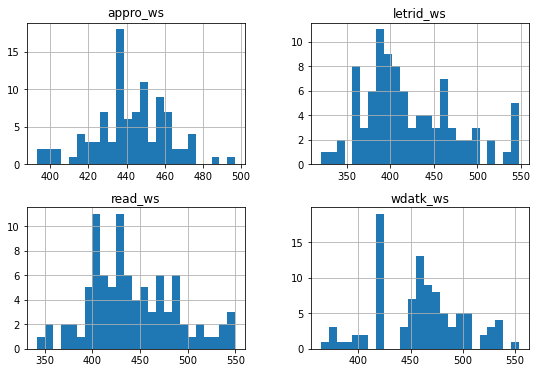

In [54]:
# 2. Replace the null values with the mean of the variable.
# Since our variables approximate a normal distribution, we can use the expected value (i.e. the mean)
# to replace the missing values.

df.hist(column=['read_ws', 'letrid_ws', 'appro_ws', 'wdatk_ws'], bins=25, figsize=(9,6))

In [63]:
df = df.fillna(df.mean())
df

,part_id2,read_ws,letrid_ws,appro_ws,wdatk_ws,gender,random,insample,gender_code
52,7,403.0,384.0,440.0,423.0,F,0.165091,1,0
72,8,436.0,404.0,432.0,468.0,M,0.213703,1,1
92,13,454.0,434.0,462.0,474.0,F,0.274725,1,0
13,18,426.0,400.0,403.0,452.0,F,0.024717,1,0
97,20,427.0,402.0,444.0,451.0,M,0.302567,1,1
...,...,...,...,...,...,...,...,...,...
5,312,540.0,542.0,444.0,537.0,F,0.012113,1,0
77,314,382.0,340.0,427.0,423.0,F,0.225161,1,0
61,318,441.0,404.0,471.0,477.0,F,0.196126,1,0
7,320,453.0,431.0,476.0,474.0,F,0.016823,1,0


In [70]:
df.isnull().sum()

part_id2       0
read_ws        0
letrid_ws      0
appro_ws       0
wdatk_ws       0
gender         0
gender_code    0
dtype: int64

# 9. Exclude (i.e., drop/delete) the following variables: random, insample

In [66]:
df = df.drop(['random', 'insample'], axis=1)
df

,part_id2,read_ws,letrid_ws,appro_ws,wdatk_ws,gender,gender_code
52,7,403.0,384.0,440.0,423.0,F,0
72,8,436.0,404.0,432.0,468.0,M,1
92,13,454.0,434.0,462.0,474.0,F,0
13,18,426.0,400.0,403.0,452.0,F,0
97,20,427.0,402.0,444.0,451.0,M,1
...,...,...,...,...,...,...,...
5,312,540.0,542.0,444.0,537.0,F,0
77,314,382.0,340.0,427.0,423.0,F,0
61,318,441.0,404.0,471.0,477.0,F,0
7,320,453.0,431.0,476.0,474.0,F,0


In [67]:
# save dataset
df.to_csv('data_analyst_pracex_clean.csv',index=False)